The MNIST database of handwritten digits has a training set dimension of 60,000 samples and 785 entries label to pixel, we selected a test set of 10,000 examples for this experiment. This is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. In this experiment. In this project we ask the question. Given this data how can a company segment this data into separate groups? I predict that using Umap will reveal a clear representation of clustering than the PCA, Kmeans and t-sne. We will also use silhouette score analysis to study the separation distance between the resulting clusters. Here the silhouette displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. 

In [1]:
!pip install umap-learn
import umap
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

# A company wants to uncover segments in their data in separate groupings.

In [2]:
mnist_df = pd.read_csv('fashionmnist/fashion-mnist_train.csv')

In [3]:
mnist_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
# display info and shape 
mnist_df.info()
mnist_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


(60000, 785)

In [5]:
mnist_df.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

In [6]:
# looking for nulls by column
mnist_df.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
X = mnist_df
y = mnist_df.label


In [8]:
mnist_df.columns = mnist_df.iloc[0]
mnist_df = mnist_df.iloc[1:]

In [9]:
# sampler
# data_df.sample?
sample_df = mnist_df.sample(
    n=10000,
    frac=None,
    replace=False,
    weights=None,
    random_state=None,
    axis=None,
)

In [10]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(sample_df)

# Can we reveal any gorupings using different algorithms?

# PCA-Model

In [11]:
# We just want the first two principal components
pca = PCA(n_components=2)

# calling fit_transform method with our data
pca_components = pca.fit_transform(sample_df)

In [12]:
pca_components

array([[-1127.70413934, -1210.56768424],
       [ -350.32235495,   -43.47957421],
       [-1412.00965278,   414.98721022],
       ...,
       [ -603.18117585,   -92.87429773],
       [ -869.46478648,  -483.80615855],
       [ 1280.63979574,   517.30115341]])

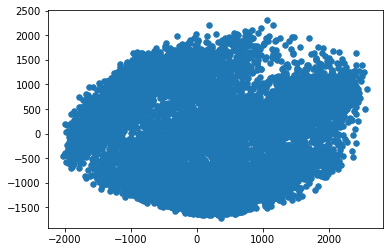

In [13]:
plt.scatter(pca_components[ : , 0], pca_components[ : , 1], s =30);

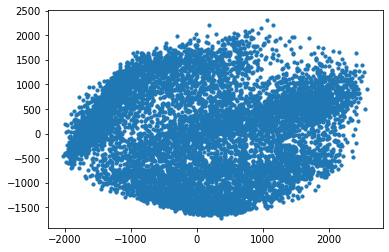

In [14]:
plt.scatter(pca_components[ : , 0], pca_components[ : , 1], s =10);

Our PCA method doesen't return any useful visualization.

In [15]:
X_std.shape

(10000, 785)

# How is t-SNE and UMAP compare in revealing groupings in our data?

# t-SNE-Model

In [16]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.563s...
[t-SNE] Computed neighbors for 10000 samples in 127.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.202321
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.535492
[t-SNE] KL divergence after 300 iterations: 2.600026
t-SNE done! Time elapse

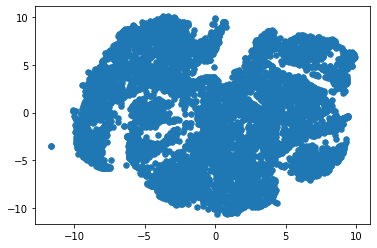

In [17]:
plt.scatter(tsne_results[ : , 0], tsne_results[ : , 1], s =30);

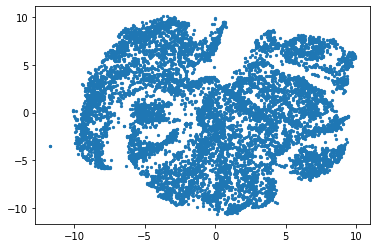

In [18]:
plt.scatter(tsne_results[ : , 0], tsne_results[ : , 1], s =5);

In [19]:
# decreasing perplexity
tsne2 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results2 = tsne2.fit_transform(X_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.572s...
[t-SNE] Computed neighbors for 10000 samples in 125.966s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.984106
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.725731
[t-SNE] KL divergence after 300 iterations: 2.796186


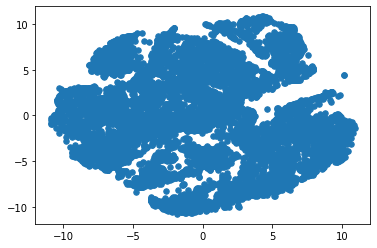

In [20]:
plt.scatter(tsne_results2[ : , 0], tsne_results2[ : , 1], s =30);

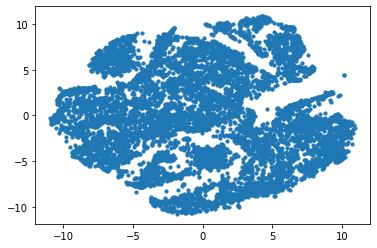

In [21]:
plt.scatter(tsne_results2[ : , 0], tsne_results2[ : , 1], s =10)

In [22]:
# increasing perplexity
tsne3 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results3 = tsne3.fit_transform(X_std)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.576s...
[t-SNE] Computed neighbors for 10000 samples in 129.334s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.366475
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.782768
[t-SNE] KL divergence after 300 iterations: 2.452309


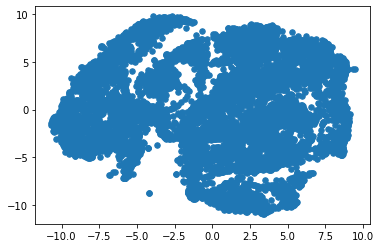

In [26]:
plt.scatter(tsne_results3[ : , 0], tsne_results3[ : , 1], s =30);

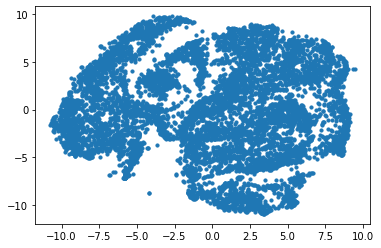

In [27]:
plt.scatter(tsne_results3[ : , 0], tsne_results3[ : , 1], s =10);

From our graph displayes above, t-SNE also does not provide a clear visible cluster. However, when perplexity is 30, there are four different clustering that is distinct and separate.

# UMAP

In [30]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 25.88646101951599 seconds


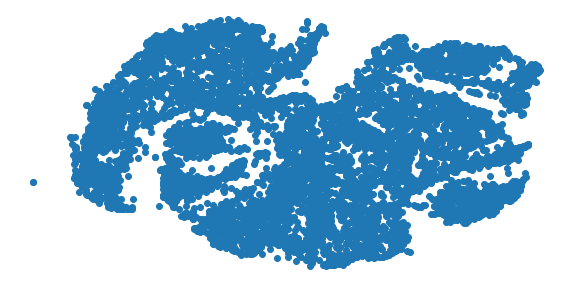

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In our above figure see very little separation in our graph. clusters are not fully separated. UMAP is much faster compared to t-sne. Umap was able to process our 10,000 sample data within 26 seconds on average compared to 156 seconds by t-sne.

In [32]:
# Here we decrease the neighbors
umap_results2 = umap.UMAP(n_neighbors=3,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_std)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 68.35490489006042 seconds


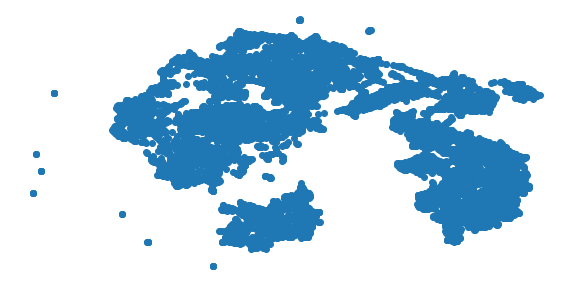

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results2[:, 0], umap_results2[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

When neighbour is equal to thee we see some separation, but we see a huge of clusters interwine to the left. No fully separation is shown.

In [34]:
# increasing neighbors and timing it, lets see our result.
umap_results3 = umap.UMAP(n_neighbors=9,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_std)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 114.00079798698425 seconds


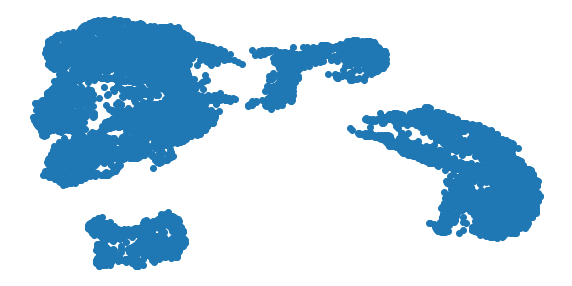

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results3[:, 0], umap_results3[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

When neighbors is equal to nine we see a big separation between the groups. One grouping is totally separated from the rest. Addition to this graph we see about six groupings intertewined. Because we set neighbours to nine, umap took 214 seconds to process our sample data. This is somthing we expect because of the large amount to neighbours being processed.

In [36]:
# lets increasing min dist and see if any difference.
umap_results4 = umap.UMAP(n_neighbors=3,
                         min_dist=0.5,
                         metric='correlation').fit_transform(X_std)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 130.7839949131012 seconds


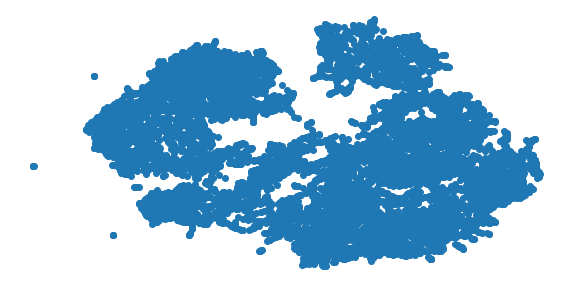

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results4[:, 0], umap_results4[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [38]:
# decreasing min dist
umap_results5 = umap.UMAP(n_neighbors=3,
                         min_dist=0.1,
                         metric='correlation').fit_transform(X_std)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 147.19482898712158 seconds


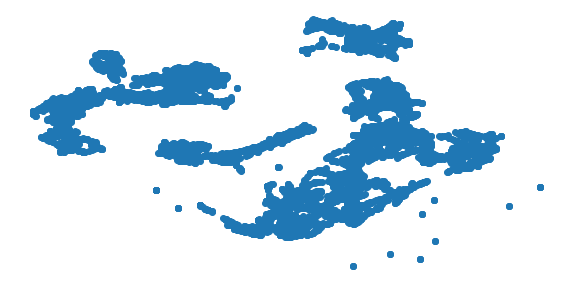

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results5[:, 0], umap_results5[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we decrease the mint distant to one, we start to see more separation and groups forming. From our graph it seems we have about seven different groupings. And we do have intertwines in the upper right, middle right and middle left.  Our umap displayed a better job than the t-sne model. Here in this graph above we are able to see separation. It seems about seven different groupings are created.

# KMeans-Model

In [41]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(sample_df)

In [45]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

6.3 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


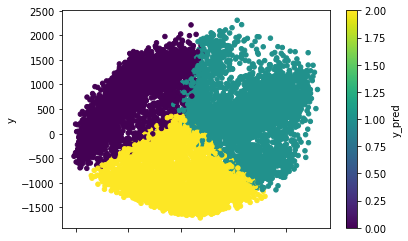

In [46]:
lazy_plot = pd.DataFrame(pca_components, columns=['x','y'])
lazy_plot['y_pred'] = y_pred
lazy_plot.plot(kind='scatter', x='x', y='y', c='y_pred', colormap='viridis')

Using three clusters is a good choice, with very little missclassification, our segmentation is very good in this graph.

In [47]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [48]:
# Defining the k-means
kmeans_cluster2 = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

6.6 s ± 269 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


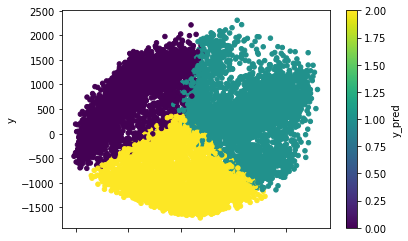

In [49]:
lazy_plot = pd.DataFrame(pca_components, columns=['x','y'])
lazy_plot['y_pred'] = y_pred
lazy_plot.plot(kind='scatter', x='x', y='y', c='y_pred', colormap='viridis')

According to our graph K-means seems to successfully identify the separable class from by their colors and labled the clusters by numbers. This is a great job by Kmeans as we see clear separation. It remains at 3 clusters this is the max.

In [44]:
kmeans_cluster2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, kmeans_cluster2, metric='euclidean'))

0.16447953606805862


Our first silhouette score displays 16.

In [64]:
label2 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, label2, metric='euclidean'))

0.1405908843706604


As we increase our cluster amount we see a decrease in our silhouette score from 16 to 14

In [66]:
label3 = KMeans(n_clusters=8, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels3, metric='euclidean'))

0.13406579557633808


Our score has drop by another point, no need to increase clusters. At cluster 2 we had our best silhouette score.

# Hireracial 

In [81]:
agg_complete = AgglomerativeClustering(linkage='complete', affinity='cosine', 
                                  n_clusters=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, agg_complete, metric='euclidean'))

0.14183634012633195


In [73]:
agg_complete2 = AgglomerativeClustering(linkage='complete', affinity='cosine', 
                                  n_clusters=3).fit_predict(X_std)
print(metrics.silhouette_score(X_std, agg_complete2, metric='euclidean'))

0.06968706061257435


In [74]:
agg_ward = AgglomerativeClustering(linkage='ward', affinity='euclidean', 
                                  n_clusters=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, agg_ward, metric='euclidean'))

0.16939269351922345


In [ ]:
agg_ward2 = AgglomerativeClustering(linkage='ward', affinity='euclidean', 
                                  n_clusters=3).fit_predict(X_std)
print(metrics.silhouette_score(X_std, agg_ward2, metric='euclidean'))

In [75]:
agg_avgerage = AgglomerativeClustering(linkage='average', affinity='cosine', 
                                  n_clusters=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, agg_avgerage, metric='euclidean'))

0.15176848827664513


In [76]:
agg_avgerage2 = AgglomerativeClustering(linkage='average', affinity='cosine', 
                                  n_clusters=3).fit_predict(X_std)
print(metrics.silhouette_score(X_std, agg_avgerage2, metric='euclidean'))

0.14978840915309743


Overall from our silhouette scores, we see ward at two clusters stands as the highest score. We will display a visual denogram representation.

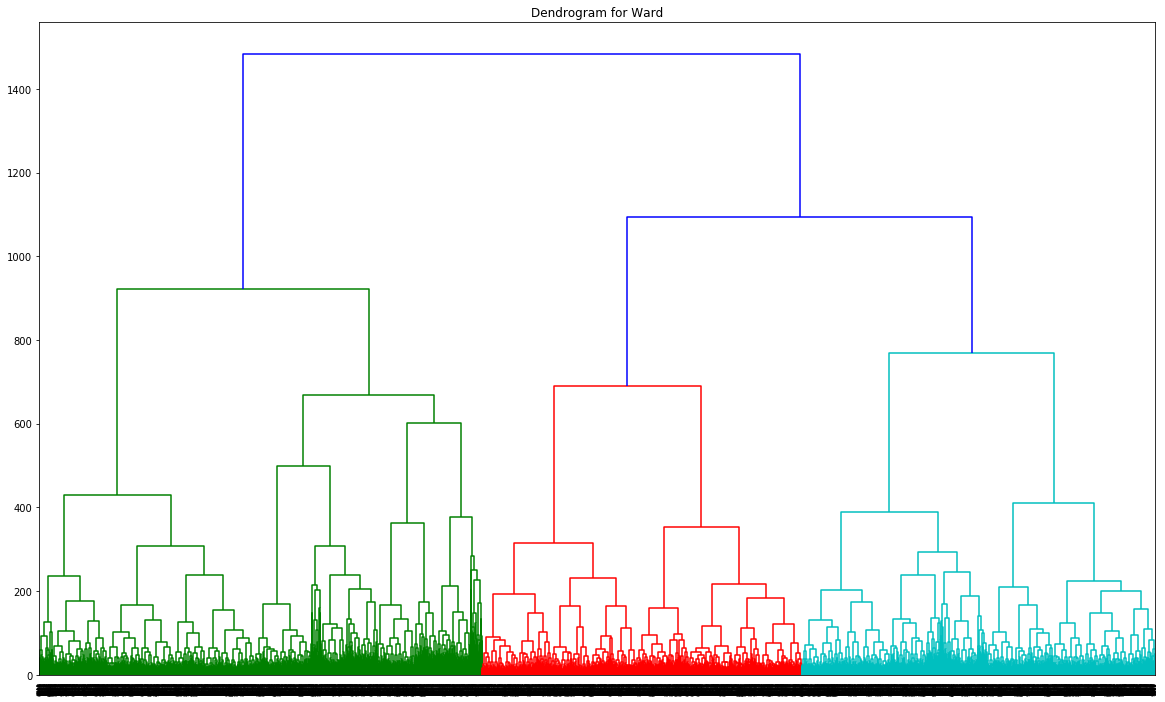

In [78]:
plt.figure(figsize=(20,12))
plt.title("Dendrogram for Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

# How do clustering and modeling compare? What are the advantages of each?

Comparsing between PCA, Umap and t-sne:

PCA is the fastet of of the three. Because of its speed we most likely would use it but it doesn't provide a good visual representation of our data if our data is high- dimensional and complex using image, text or audio.

Our umap is very fast at processing and displaying our graphs. It also does a good job separating clusters by capturing the global structure of our data. UMAP's speed makes it a better choice when it comes to visualization of high-dimensional complex data like image, text and audio.
 
The slowness of applying t-SNE on large datasets is a serious concern especially if we lack time and computing resources. That being said we notice t-SNE does capture the local similarity but lacks total seaparation from each cluster. We do see some separation but interwines between clustering.

Comparing the clusters of Kmeans we see some advantages are its relatively simple to implement, it scales to large data sets and there's a guarantee convergence and it can easily adapts to new examples. Some disavantages are manually finding the cantroids, miscalssification when clusters are generated.

Comparing Silhoutte Scores between kmeans and hirarical 
According to our silhoutte scores we see Kmeans has the highest which is 16. This means it displays a better measure of how close each point in one cluster. 